In [1]:
import sys
!"{sys.executable}" -m pip install atomic_physics

  Using cached atomic_physics-2.0.5-py3-none-any.whl.metadata (552 bytes)
Using cached atomic_physics-2.0.5-py3-none-any.whl (55 kB)


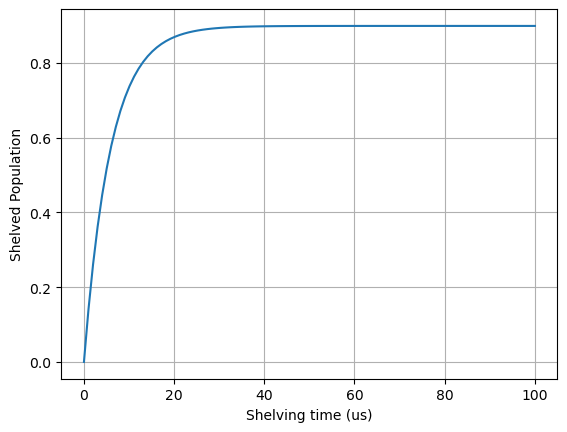

In [3]:
"""Simple rate equations example of 393 shelving in 43Ca+."""

import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import expm

from atomic_physics.core import Laser
from atomic_physics.ions.ca43 import Ca43
from atomic_physics.rate_equations import Rates

t_ax = np.linspace(0, 100e-6, 100)
intensity = 0.02  # 393 intensity

ion = Ca43(magnetic_field=146e-4)
stretch = ion.get_state_for_F(Ca43.ground_level, F=4, M_F=+4)

rates = Rates(ion)
delta = ion.get_transition_frequency_for_states(
    (stretch, ion.get_state_for_F(Ca43.P32, F=5, M_F=+5))
)
lasers = (
    Laser("393", polarization=+1, intensity=intensity, detuning=delta),
)  # resonant 393 sigma+
trans = rates.get_transitions_matrix(lasers)

Vi = np.zeros((ion.num_states, 1))  # initial state
Vi[stretch] = 1  # start in F=4, M=+4
shelved = np.zeros(len(t_ax))
for idx, t in np.ndenumerate(t_ax):
    Vf = expm(trans * t) @ Vi
    shelved[idx] = np.sum(Vf[ion.get_slice_for_level(Ca43.shelf)])

plt.plot(t_ax * 1e6, shelved)
plt.ylabel("Shelved Population")
plt.xlabel("Shelving time (us)")
plt.grid()
plt.show()
